# KNN
Test of K-nn algorithm on the IRT phase 1 ratios

In [13]:
import json
import os
import numpy as np

### Nous avons 18 ratios et 17 classes

In [14]:
features = []
features_label = []

path_save = "../json/features_labelise/"
dirs = os.listdir(path_save)

for f in dirs:
    #print ("computing data in : " + path_save + f)
    with open(path_save + f, 'r') as file:
        feature = json.load(file)
    temp = []
    temp.append(feature["Ratio_band1_0_band2_1_scale_1"])
    temp.append(feature["Ratio_band1_0_band2_1_scale_2"])
    temp.append(feature["Ratio_band1_0_band2_2_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_1_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_2_scale_2"])
    temp.append(feature["Ratio_band1_0_band2_2_scale_1"])
    temp.append(feature["Ratio_band1_1_band2_3_scale_2"])
    temp.append(feature["Ratio_band1_1_band2_3_scale_1"])
    temp.append(feature["Ratio_band1_1_band2_3_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_3_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_3_scale_2"])
    temp.append(feature["Ratio_band1_2_band2_3_scale_4"])
    temp.append(feature["Ratio_band1_0_band2_3_scale_1"])
    temp.append(feature["Ratio_band1_1_band2_2_scale_4"])
    temp.append(feature["Ratio_band1_1_band2_2_scale_2"])
    temp.append(feature["Ratio_band1_1_band2_2_scale_1"])
    temp.append(feature["Ratio_band1_2_band2_3_scale_1"])
    temp.append(feature["Ratio_band1_2_band2_3_scale_2"])
    features.append(temp)
    features_label.append(feature["Label"])
    file.close()
    



In [15]:
features = np.array(features).astype(np.float)
features_label = np.array(features_label)
print(features.shape)
print(features_label.shape)

(150510, 18)
(150510,)


### On fait sur le dataset 80% de train et 20% de test 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, features_label, test_size=0.20, random_state=42)

print("Taille dataset test ", x_test.shape)

Taille dataset test  (30102, 18)


### Sur le dataset train on refait 80% de train et 20% de validation

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

print("Taille dataset train ,", x_train.shape)
print("Taille dataset validation ,", x_valid.shape)

Taille dataset train , (96326, 18)
Taille dataset validation , (24082, 18)


# K nearest neighbors

In [36]:
X = x_train.astype(np.float)
y = y_train
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=101, weights='uniform')
model.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=101, p=2,
           weights='uniform')

In [37]:
model.score(x_valid, y_valid)

0.59521634415746205

##### Le résultat est décevant, seulement 60% de précision. Knn ne semble pas être un algo adapté au problème.

In [20]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Confusion matrix

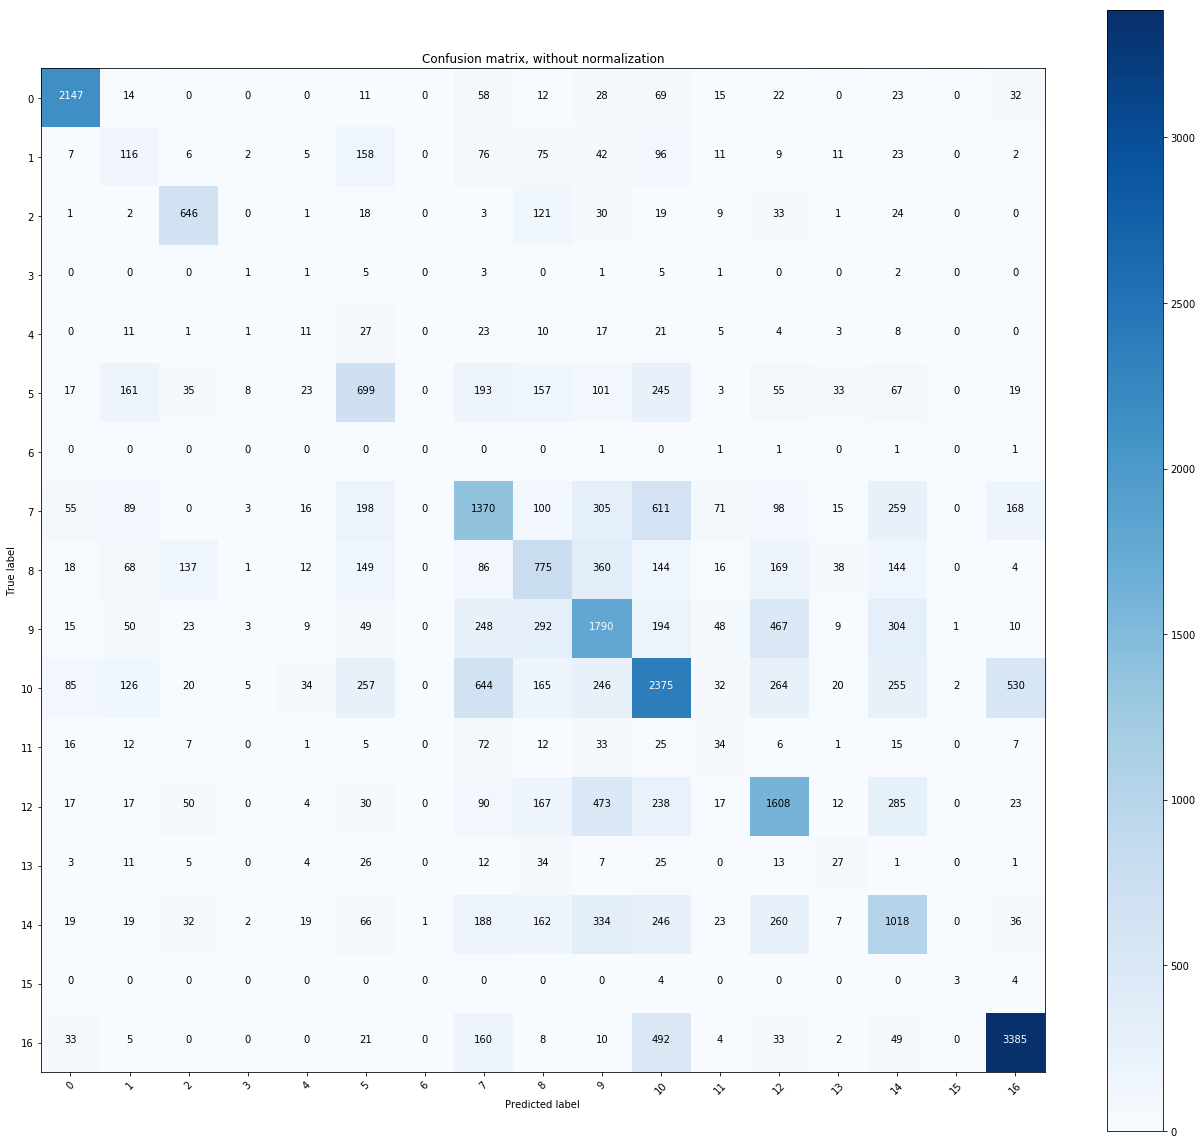

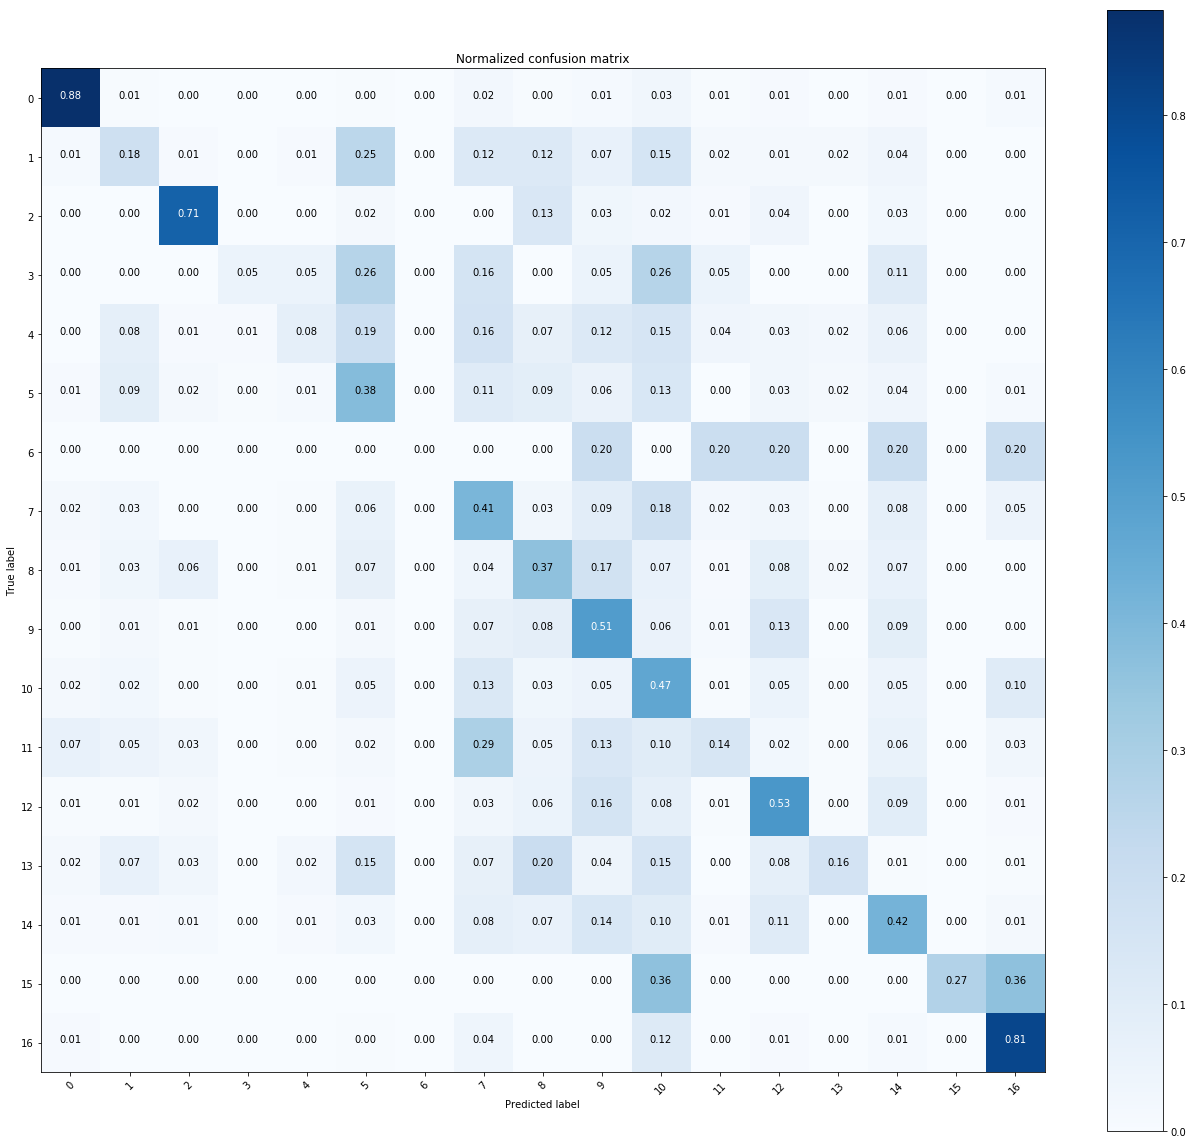

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

predicted = model.predict(x_test)
class_names = [str(i) for i in range(0,17)]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
np.set_printoptions(precision=2)   

# Plot non-normalized confusion matrix
plt.figure(figsize=(18, 16))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(18, 16))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()